In [1]:
#packages for data analysis
import numpy as np
import pandas as pd

import sklearn
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#to visualize data
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

# (# id:13--13-13-0)

In [2]:
week4_1 = pd.read_csv('/Users/vivekbhadula/TCD Study/MachineLearning/Week4/week4_1.csv', header=None);
week4_2 = pd.read_csv('week4_2.csv',header=None)
print(f'The shape of Week4_1 csv file is: {week4_1.shape} \nand that of Week4_2 is: {week4_2.shape} \n')
print(f'{week4_1.head()} \n\n {week4_2.head()}')

The shape of Week4_1 csv file is: (1880, 3) 
and that of Week4_2 is: (662, 3) 

      0     1  2
0  0.06  0.63  1
1 -0.88  0.00 -1
2 -0.37  0.76  1
3 -0.84  0.62 -1
4  0.01 -0.32 -1 

       0     1  2
0  0.37  0.54  1
1  0.15  0.49 -1
2  0.25  0.63  1
3  0.92  0.30  1
4 -0.78 -0.24  1


In [3]:
X1 = week4_1.iloc[:,0]
X2 = week4_1.iloc[:,1]
x = np.column_stack((X1,X2))
y = week4_1.iloc[:,2]

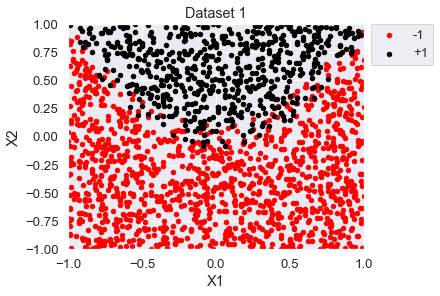

In [24]:
plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X1[y==-1], X2[y==-1], color='red', label='-1', s=20)
plt.scatter(X1[y==1], X2[y==1], color='black', label='+1', s=20)

plt.legend(bbox_to_anchor=(1, 1.03)) 

plt.xlim(-1, 1) 
plt.ylim(-1, 1) 

plt.title('Dataset 1')
plt.show()

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

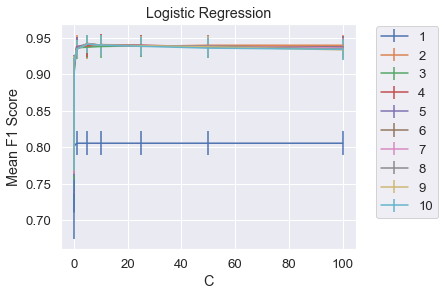

In [5]:
for i in range(1,11):
    trans = PolynomialFeatures(degree=i)
    newRows = trans.fit_transform(x)
    meanError=[]
    stdError=[]
    cArr = [0.01, 0.1, 1, 5, 10, 25, 50, 100]
    for c in cArr:
        logModel = LogisticRegression(C=c)

        scores = cross_val_score(logModel, newRows, y, cv=5, scoring='f1')
        meanError.append(np.array(scores).mean())
        stdError.append(np.array(scores).std())

    plt.rc("font", size=18)
    plt.rcParams['figure.constrained_layout.use'] = True
    plt.errorbar(cArr,meanError,yerr=stdError, label=f'{i}')
    plt.legend(bbox_to_anchor=(1.3, 1.02))
    plt.title('Logistic Regression')
    plt.xlabel('C')
    plt.ylabel('Mean F1 Score')

Text(0, 0.5, 'Mean F1 Score')

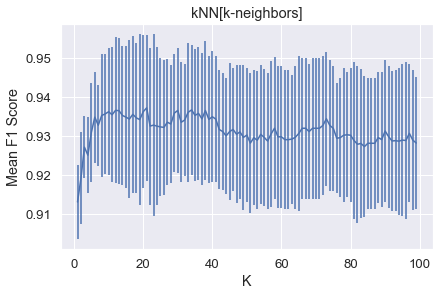

In [6]:
KmeanError=[]
KstdError=[]
for i in range(1,100):
    kNNmodel = KNeighborsClassifier(i)

    scores = cross_val_score(kNNmodel, x, y, cv=5, scoring='f1')
    KmeanError.append(np.array(scores).mean())
    KstdError.append(np.array(scores).std())
    
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(list(range(1,100)),KmeanError,yerr=KstdError)
plt.title('kNN[k-neighbors]')
plt.xlabel('K')
plt.ylabel('Mean F1 Score')

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
Kmodel = KNeighborsClassifier(21).fit(Xtrain, ytrain)
Kpreds = Kmodel.predict(Xtest)
print('This is for kNN:')
print(confusion_matrix(ytest, Kpreds))
print(classification_report(ytest, Kpreds))

This is for kNN:
[[249   5]
 [  6 116]]
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       254
           1       0.96      0.95      0.95       122

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



In [34]:
trans = PolynomialFeatures(degree=2)
newRows = trans.fit_transform(x)
XtrainL, XtestL, ytrainL, ytestL = train_test_split(newRows,y,test_size=0.2)
Lmodel = LogisticRegression(C=10).fit(XtrainL, ytrainL)
Lpreds = Lmodel.predict(XtestL)
print('This is for Logistic Regression: ')
print(confusion_matrix(ytestL, Lpreds))
print(classification_report(ytestL, Lpreds))

This is for Logistic Regression: 
[[244   8]
 [  7 117]]
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       252
           1       0.94      0.94      0.94       124

    accuracy                           0.96       376
   macro avg       0.95      0.96      0.95       376
weighted avg       0.96      0.96      0.96       376



In [35]:
dummy = DummyClassifier(strategy='most_frequent').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print('This is for Dummy Classifier: ')
print(confusion_matrix(ytest, ydummy))
print(classification_report(ytest, ydummy))

This is for Dummy Classifier: 
[[254   0]
 [122   0]]
              precision    recall  f1-score   support

          -1       0.68      1.00      0.81       254
           1       0.00      0.00      0.00       122

    accuracy                           0.68       376
   macro avg       0.34      0.50      0.40       376
weighted avg       0.46      0.68      0.54       376



/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [10]:
LmodelProba = Lmodel.predict_proba(XtestL)
KmodelProba = Kmodel.predict_proba(Xtest)
DmodelProba = dummy.predict_proba(Xtest)

In [11]:
Lfpr1, Ltpr1, _ = roc_curve(ytestL, LmodelProba[:,1], pos_label=1)
Kfpr2, Ktpr2, _ = roc_curve(ytest, KmodelProba[:,1], pos_label=1)
Dfpr3, Dtpr3, _ = roc_curve(ytest, DmodelProba[:,1], pos_label=1)

LAucScore = roc_auc_score(ytestL, LmodelProba[:,1])
KAucScore = roc_auc_score(ytest, KmodelProba[:,1])

print(f'This is the roc_auc_score for Logistic Regression: {LAucScore}')
print(f'This is the roc_auc_score for KNN: {KAucScore}')

This is the roc_auc_score for Logistic Regression: 0.9953893442622951
This is the roc_auc_score for KNN: 0.9962626563430613


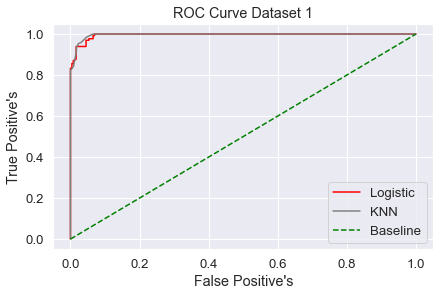

In [12]:
plt.plot(Lfpr1, Ltpr1, linestyle='-',color='red', label='Logistic')
plt.plot(Kfpr2, Ktpr2, linestyle='-',color='grey', label='KNN')
plt.plot(Dfpr3, Dtpr3, linestyle='--', color='green', label='Baseline')

plt.title('ROC Curve Dataset 1')
plt.xlabel('False Positive\'s')
plt.ylabel('True Positive\'s')
plt.legend(loc='best')
plt.show()

## Dataset 2

In [13]:
X21 = week4_2.iloc[:,0]
X22 = week4_2.iloc[:,1]
x2 = np.column_stack((X21,X22))
y2 = week4_2.iloc[:,2]

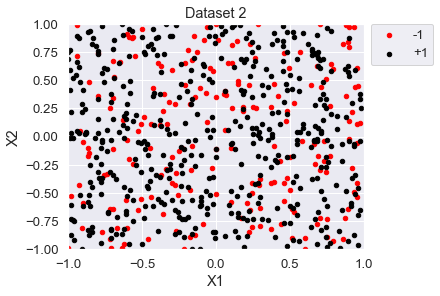

In [25]:
plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X21[y2==-1], X22[y2==-1], color='red', label='-1', s=20)
plt.scatter(X21[y2==1], X22[y2==1], color='black', label='+1', s=20)

plt.legend(bbox_to_anchor=(1, 1.03)) 

plt.xlim(-1, 1) 
plt.ylim(-1, 1)

plt.title('Dataset 2')
plt.show()

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

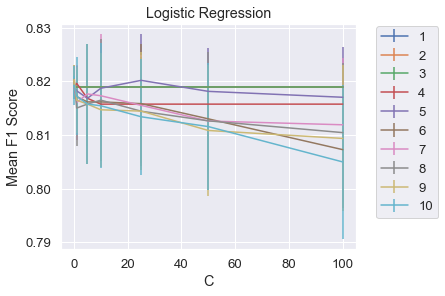

In [15]:
for i in range(1,11):
    trans = PolynomialFeatures(degree=i)
    newRows = trans.fit_transform(x2)
    LmeanError=[]
    LstdError=[]
    cArr = [0.01, 0.1, 1, 5, 10, 25, 50, 100]
    for c in cArr:
        logModel = LogisticRegression(C=c)

        scores = cross_val_score(logModel, newRows, y2, cv=5, scoring='f1')
        LmeanError.append(np.array(scores).mean())
        LstdError.append(np.array(scores).std())

    plt.rc("font", size=18); plt.rcParams['figure.constrained_layout.use'] = True
    plt.errorbar(cArr,LmeanError,yerr=LstdError, label=f'{i}')
    plt.legend(bbox_to_anchor=(1.3, 1.02))
    plt.title('Logistic Regression')
    plt.xlabel('C')
    plt.ylabel('Mean F1 Score')

Text(0, 0.5, 'Mean F1 Score')

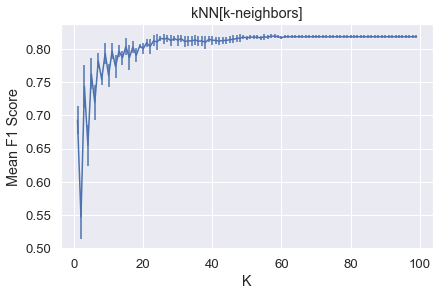

In [16]:
KmeanError=[]
KstdError=[]
for i in range(1,100):
    kNNmodel = KNeighborsClassifier(i)

    scores = cross_val_score(kNNmodel, x2, y2, cv=5, scoring='f1')
    KmeanError.append(np.array(scores).mean())
    KstdError.append(np.array(scores).std())
    
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(list(range(1,100)),KmeanError,yerr=KstdError)
plt.title('kNN[k-neighbors]')
plt.xlabel('K')
plt.ylabel('Mean F1 Score')

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x2,y2,test_size=0.2)
Kmodel2 = KNeighborsClassifier(50).fit(Xtrain, ytrain)
Kpreds2 = Kmodel2.predict(Xtest)
print('This is for kNN: ')
print(confusion_matrix(ytest, Kpreds2))
print(classification_report(ytest, Kpreds2))

This is for kNN: 
[[ 0 35]
 [ 0 98]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.74      1.00      0.85        98

    accuracy                           0.74       133
   macro avg       0.37      0.50      0.42       133
weighted avg       0.54      0.74      0.63       133



/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [44]:
trans2 = PolynomialFeatures(degree=2)
newRows2 = trans2.fit_transform(x2)
XtrainL2, XtestL2, ytrainL2, ytestL2 = train_test_split(newRows2,y2,test_size=0.2)
Lmodel2 = LogisticRegression(C=0.01).fit(XtrainL2, ytrainL2)
Lpreds2 = Lmodel2.predict(XtestL2)
print('This is for Logistic Regression: ')
print(confusion_matrix(ytestL2, Lpreds2))
print(classification_report(ytestL2, Lpreds2))

This is for Logistic Regression: 
[[ 0 45]
 [ 0 88]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        45
           1       0.66      1.00      0.80        88

    accuracy                           0.66       133
   macro avg       0.33      0.50      0.40       133
weighted avg       0.44      0.66      0.53       133



/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [48]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x2,y2,test_size=0.2)
dummy2 = DummyClassifier(strategy='most_frequent').fit(Xtrain, ytrain)
ydummy2 = dummy2.predict(Xtest)
print('This is for Dummy Classifier: ')
print(confusion_matrix(ytest, ydummy2))
print(classification_report(ytest, ydummy2))

This is for Dummy Classifier: 
[[ 0 39]
 [ 0 94]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           1       0.71      1.00      0.83        94

    accuracy                           0.71       133
   macro avg       0.35      0.50      0.41       133
weighted avg       0.50      0.71      0.59       133



/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [47]:
LmodelProba2 = Lmodel2.predict_proba(XtestL2)
KmodelProba2 = Kmodel2.predict_proba(Xtest)
DmodelProba2 = dummy2.predict_proba(Xtest)

In [21]:
L2fpr1, L2tpr1, _ = roc_curve(ytestL2, LmodelProba2[:,1], pos_label=1)
K2fpr2, K2tpr2, _ = roc_curve(ytest, KmodelProba2[:,1], pos_label=1)
D2fpr3, D2tpr3, _ = roc_curve(ytest, DmodelProba2[:,1], pos_label=1)

LAucScore2 = roc_auc_score(ytestL2, LmodelProba2[:,1])
KAucScore2 = roc_auc_score(ytest, KmodelProba2[:,1])

print(f'This is the roc_auc_score for Logistic Regression: {LAucScore2}')
print(f'This is the roc_auc_score for KNN: {KAucScore2}')

This is the roc_auc_score for Logistic Regression: 0.3942798774259449
This is the roc_auc_score for KNN: 0.6146578140960163


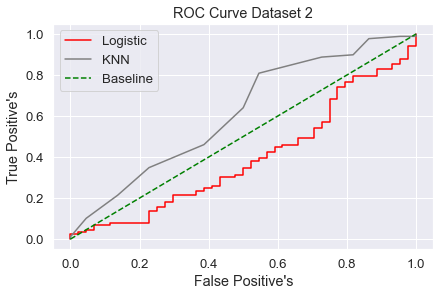

In [22]:
plt.plot(L2fpr1, L2tpr1, linestyle='-',color='red', label='Logistic')
plt.plot(K2fpr2, K2tpr2, linestyle='-',color='grey', label='KNN')
plt.plot(D2fpr3, D2tpr3, linestyle='--', color='green', label='Baseline')

plt.title('ROC Curve Dataset 2')
plt.xlabel('False Positive\'s')
plt.ylabel('True Positive\'s')
plt.legend(loc='best')
plt.show()